In [25]:
import pandas as pd

In [26]:
f=open("/content/datadt.txt",'r')
dt=f.read()

In [27]:
df=dt.split('\n')
dat=[]
for data in df:
    word=data.split('\t')
    print(word)
    dat.append(word)
ndf=pd.DataFrame(dat,columns=['Age','Competition','Type','profit'])

['Old', 'Yes', 'Software', 'Down']
['Old', 'No', 'Software', 'Down']
['Old', 'No', 'Hardware', 'Down']
['Mid', 'Yes', 'Software', 'Down']
['Mid', 'Yes', 'Hardware', 'Down']
['Mid', 'No', 'Hardware', 'Up']
['Mid', 'No', 'Software', 'Up']
['New', 'Yes', 'Software', 'Up']
['New', 'No', 'Hardware', 'Up']
['New', 'No', 'Software', 'Up']
['Mid', 'No', 'Hardware', '?']


In [32]:
x_train=ndf.iloc[:,0:3]
y_train=ndf.iloc[:,3]
print(x_train)
print(y_train)


    Age Competition      Type
0   Old         Yes  Software
1   Old          No  Software
2   Old          No  Hardware
3   Mid         Yes  Software
4   Mid         Yes  Hardware
5   Mid          No  Hardware
6   Mid          No  Software
7   New         Yes  Software
8   New          No  Hardware
9   New          No  Software
10  Mid          No  Hardware
0     Down
1     Down
2     Down
3     Down
4     Down
5       Up
6       Up
7       Up
8       Up
9       Up
10       ?
Name: profit, dtype: object


In [29]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree

In [34]:
x_train = pd.get_dummies(x_train)
x_train

,Age_Mid,Age_New,Age_Old,Competition_No,Competition_Yes,Type_Hardware,Type_Software
0,0,0,1,0,1,0,1
1,0,0,1,1,0,0,1
2,0,0,1,1,0,1,0
3,1,0,0,0,1,0,1
4,1,0,0,0,1,1,0
5,1,0,0,1,0,1,0
6,1,0,0,1,0,0,1
7,0,1,0,0,1,0,1
8,0,1,0,1,0,1,0
9,0,1,0,1,0,0,1


In [35]:

clf_tree=DecisionTreeClassifier(random_state=0,max_depth=3)
clf_fit=clf_tree.fit(x_train,y_train)


In [39]:
x_test=np.array([1,0,0,1,0,1,0])
x_test=x_test.reshape(1,-1)
predicted=clf_fit.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
print(predicted)


['Up']


In [41]:
from sklearn.tree import plot_tree

In [42]:
clf_tree.feature_importances_

array([0.26506024, 0.        , 0.42018072, 0.26174699, 0.        ,
       0.05301205, 0.        ])

In [43]:
x_train.columns

Index(['Age_Mid', 'Age_New', 'Age_Old', 'Competition_No', 'Competition_Yes',
       'Type_Hardware', 'Type_Software'],
      dtype='object')

In [46]:
pd.DataFrame(index=x_train.columns,data=clf_tree.feature_importances_,columns=["Feature Importance"]).sort_values("Feature Importance")


,Feature Importance
Age_New,0.000000
Competition_Yes,0.000000
Type_Software,0.000000
Type_Hardware,0.053012
Competition_No,0.261747
Age_Mid,0.265060
Age_Old,0.420181


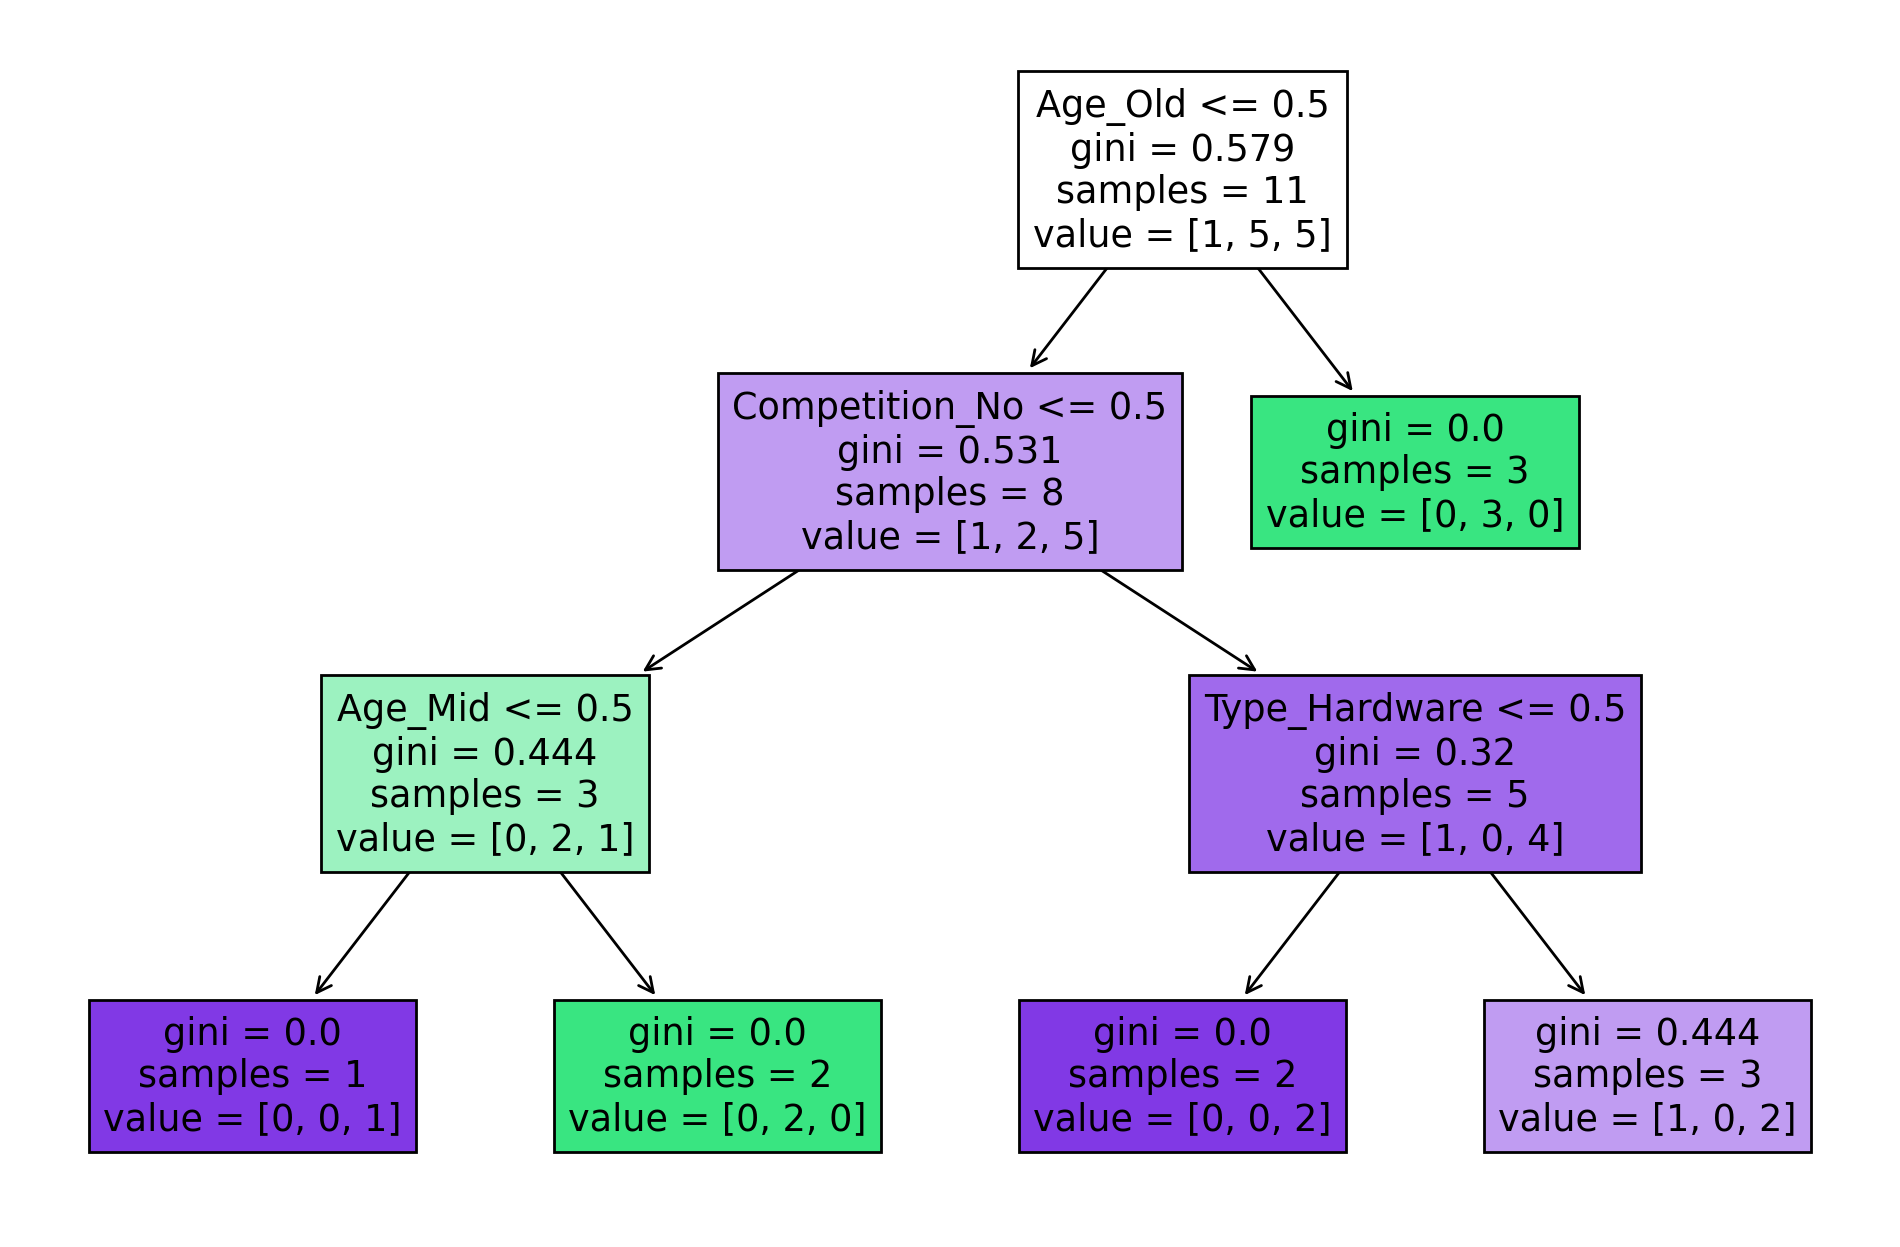

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8), dpi=200)
plot_tree(clf_tree,feature_names=x_train.columns,filled=True);